<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
plt.style.use('fivethirtyeight')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [95]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [96]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [97]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [98]:
# Answer:
# Way I
movies.loc[:, 'duration'].mean()

# Way II , just for reference
# movies['duration'].mean()
# I personally prefer Way I as it gives more clarity, but will appreciate your inputs if there is a industry standard

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [99]:
# Answer:
title_duration_sorted = movies.loc[:, ['title', 'duration']].sort_values('duration')
print ('shortest movie title', title_duration_sorted.iloc[0, 0])
print ('longest movie title', title_duration_sorted.iloc[-1, 0])

shortest movie title Freaks
longest movie title Hamlet


#### Create a histogram of duration, choosing an "appropriate" number of bins.

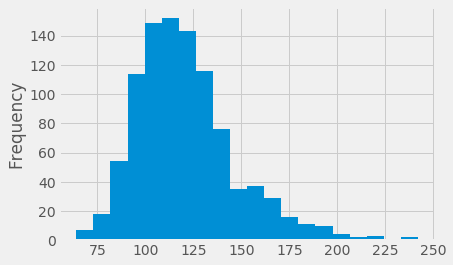

In [100]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'duration'].plot(kind='hist', bins=20, ax=ax);

#### Use a box plot to display that same data.

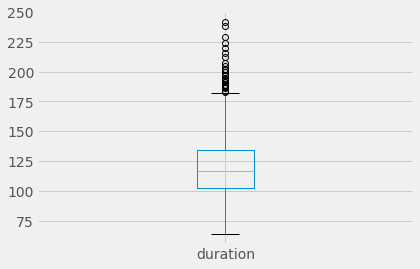

In [101]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'duration'].plot(kind='box', ax=ax);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [102]:
# Answer:
movies.groupby('content_rating').size()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

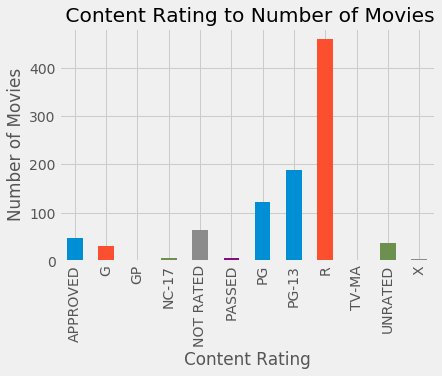

In [103]:
# Answer:
movies_by_rating = movies.groupby('content_rating').size()

fig, ax = plt.subplots()
movies_by_rating.plot(kind='bar', ax=ax);
ax.set_title(' Content Rating to Number of Movies');
ax.set_xlabel('Content Rating');
ax.set_ylabel('Number of Movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [110]:
# Answer:
movies_content_rating_convert = movies.loc[:,'content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])
movies.loc[movies_content_rating_convert, 'content_rating'] = 'UNRATED'

In [116]:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [117]:
# Answer:
movies_content_rating_convert_nc = movies.loc[:,'content_rating'].isin(['X', ' TV-MA'])
movies.loc[movies_content_rating_convert_nc, 'content_rating'] = 'NC-17'

#### Count the number of missing values in each column.

In [119]:
# Answer:
movies.loc[:, :].isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [139]:
# Answer:
missing_values = movies.loc[:,'content_rating'].isnull()
movies.loc[missing_values, ['content_rating', 'title']]
movies.iloc[187, 2] = 'PG'
movies.iloc[649, 2] = 'PG'
movies.iloc[936, 2] = 'PG'
movies.loc[missing_values, ['content_rating', 'title']]



,content_rating,title


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [231]:
# Answer:
long_movies = movies.loc[:, 'duration'] >= 120
avg_rating_long_movies = movies.loc[long_movies, 'star_rating'].mean()
avg_rating_short_movies = movies.loc[~long_movies, 'star_rating'].mean()
print (avg_rating_long_movies)
print (avg_rating_short_movies)

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

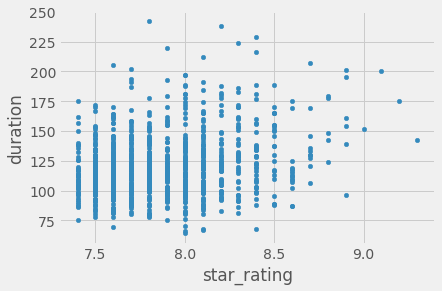

In [157]:
# Answer:
movies_duration_rating = movies.loc[:, ['duration', 'star_rating']]
fig, ax = plt.subplots()
movies_duration_rating.plot(kind='scatter', x='star_rating', y='duration', ax=ax);

#### Calculate the average duration for each genre.

In [159]:
# Answer:
movies.loc[:, ['genre', 'duration']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

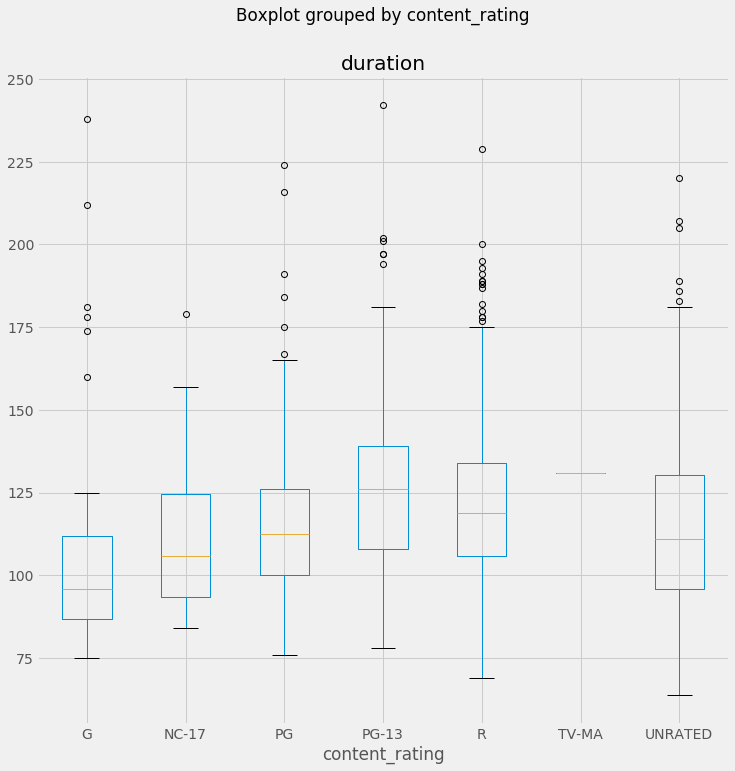

In [190]:
# Answer:
movies.boxplot(column='duration', by='content_rating',figsize=(12, 12));


#### Determine the top rated movie (by star rating) for each genre.

In [196]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [229]:
# Answer:
duplicate_title = movies.loc[movies.title.duplicated() == True, 'title']
movie_with_duplicate_title = movies.loc[:, 'title'].isin(duplicate_title)
movies.loc[movie_with_duplicate_title, :]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [264]:
# Answer:
movies.groupby('genre').count()
top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies_with_top_genres = movies.loc[:,'genre'].isin(top_genres)
(movies.loc[movies_with_top_genres, :]
    .groupby('genre')
    ['star_rating']
    .mean()
)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [315]:
# Answer:

genre_movies_count = (movies.loc[:, 'genre'].value_counts())
top_genre = genre_movies_count[genre_movies_count >= 10].index
movies.loc[movies.loc[:, 'genre'].isin(top_genre), :].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [328]:
# Answer:
(movies.groupby('genre')
    ['star_rating']
    .mean()
    [movies.loc[:, 'genre'].value_counts() >= 10]
)

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [344]:
# Answer:
genre_ratings = (movies.groupby('genre')
     ['star_rating']
     .agg(['count', 'mean'])
                )
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [349]:
movies.sort_values('star_rating', ascending=False)['actors_list']

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
5      [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
6      [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
7      [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...
8      [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...
9      [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...
13       [u'Tom Hanks', u'Robin Wright', u'Gary Sinise']
14     [u'Elijah Wood', u'Ian McKellen', u'Viggo Mort...
10     [u'Elijah Wood', u'Ian McKellen', u'Orlando Bl...
12     [u'Mark Hamill', u'Harrison Ford', u'Carrie Fi...
11     [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
20     [u'Keanu Reeves', u'Laurence Fishburne', u'Car...
24     [u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac...
23     [u'Kevin Spacey', u'Gabr